In [51]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# The path to our CSV file
file = "rig_count_unix_date.csv"

# Read our rig count data into pandas
df = pd.read_csv(file)
df.head()




,DATE,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Delaware,D.C.,Florida,...,Vermont,Virginia,Wash.,W. Virgina,Wisconsin,Wyoming,TOTAL US,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,36532.0,2.0,3.0,0.0,1.0,16.0,19.0,0.0,0.0,0.0,...,0.0,1.0,0.0,13.0,0.0,42.0,659.0,786.0,NaN,NaN
1,36539.0,2.0,6.0,0.0,0.0,16.0,18.0,0.0,0.0,0.0,...,0.0,0.0,0.0,13.0,0.0,41.0,656.0,781.0,NaN,NaN
2,36546.0,1.0,5.0,0.0,0.0,17.0,19.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.0,36.0,652.0,777.0,NaN,NaN
3,36553.0,1.0,4.0,0.0,0.0,17.0,17.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,36.0,630.0,755.0,NaN,NaN
4,36560.0,0.0,4.0,0.0,0.0,15.0,18.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4.0,0.0,36.0,630.0,757.0,NaN,NaN


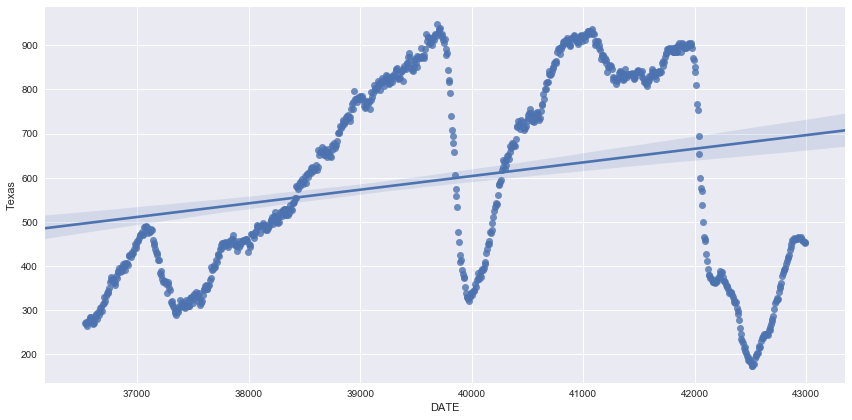

In [57]:
# Try to make a first chart
sns.lmplot(x = 'DATE', y = 'Texas', data = df, size = 6, aspect = 2 )
plt.show()


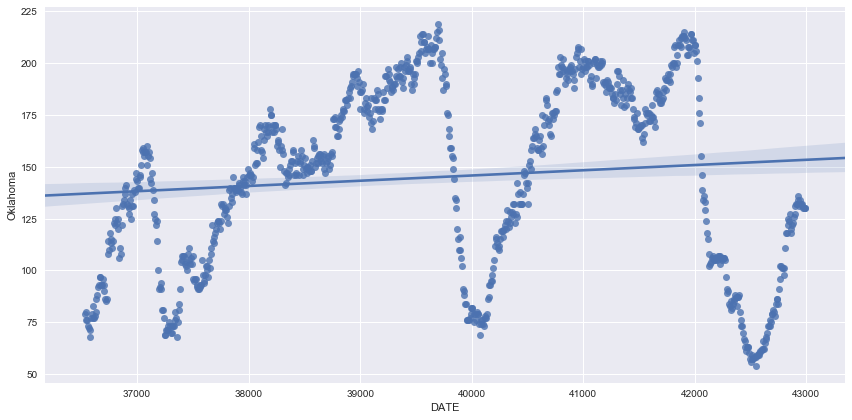

In [58]:
# Try to make a first chart
sns.lmplot(x = 'DATE', y = 'Oklahoma', data = df, size = 6, aspect = 2 )
plt.show()

In [59]:
# Try to make a first chart
sns.lmplot(x = 'DATE', y = 'W. Virgina', data = df, size = 6, aspect = 2 )
plt.show()

KeyError: "['W. Virginia'] not in index"